In [1]:
import os
import numpy as np
import keras
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.nasnet import NASNetMobile
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.optimizers import RMSprop
import functools
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import LearningRateScheduler
import math
from tensorflow.keras.applications import InceptionV3

In [2]:
MODEL_NAME = "M_CNN_M1_10_20.h5"
IMG_ROWS, IMG_COLS = 150, 150
INPUT_SHAPE=(150, 150, 3)
PATH = 'data/processed_data/'
TRAIN_DATA_PATH = os.path.join(PATH, 'Training')
TEST_DATA_PATH = os.path.join(PATH, 'Testing')
BATCH_SIZE = 32
NUM_EPOCHS = 150
CLASS_MODE = 'categorical'
COLOR_MODE = 'rgb'
SAVE_FORMAT = 'png'
#32 bs, 50 e, processed data - 75%
#32 bs, 50 e, raw data - 29

In [3]:

data_dir_list =np.sort(os.listdir(TRAIN_DATA_PATH))
data_dir_list

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [4]:

data_dir_list_Test =np.sort(os.listdir(TEST_DATA_PATH))
data_dir_list_Test

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [5]:
train_data_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.5, 
    rescale=1./255,
    vertical_flip=True, 
    validation_split=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True) 

In [6]:
train_generator = train_data_gen.flow_from_directory(
        TRAIN_DATA_PATH,
        target_size=(IMG_ROWS, IMG_COLS), 
        batch_size=BATCH_SIZE,
        class_mode=CLASS_MODE,
        color_mode=COLOR_MODE, 
        shuffle=True,   
        save_format=SAVE_FORMAT, 
        subset="training")


val_generator = train_data_gen.flow_from_directory(
    TRAIN_DATA_PATH,
    target_size=(IMG_ROWS, IMG_COLS), 
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE, 
    shuffle=True,   
    save_format=SAVE_FORMAT, 
    subset='validation'
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [7]:
train_generator.samples 

2297

In [8]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_PATH,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE, 
    shuffle = False,
    seed=None,  
    save_format=SAVE_FORMAT
)


Found 394 images belonging to 4 classes.


In [10]:

def create_inception_model():
    
    # Base model, with weights pre-trained on ImageNet.
    base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(4, activation='softmax')(x)

    model = tf.keras.models.Model(base_model.input, x)
    
    learning_rate = 0.5
    momentum = 0.8
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, nesterov=False)

    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])
    
    return model

In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [12]:
def step_decay(epoch):
   initial_lrate = 0.5
   drop = 0.5
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

lr_scheduler =keras.callbacks.LearningRateScheduler(step_decay, verbose=1)

In [13]:

callbacks_list  = [lr_scheduler]

In [14]:
#model = create_nasnet_model()

# Train the model
#history = model.fit(
#    train_generator,
#    validation_data=val_generator,
#    epochs=NUM_EPOCHS,
#   workers=6,
#    max_queue_size=100,
#    verbose=True,
#    callbacks=callbacks_list
#)

In [15]:
model = create_inception_model()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=NUM_EPOCHS,
   workers=6,
    max_queue_size=100,
    verbose=True,
    callbacks=callbacks_list
)





Epoch 00001: LearningRateScheduler reducing learning rate to 0.5.
Epoch 1/150
72/72 [==============================] - 38s 524ms/step - loss: 9353.8232 - acc: 0.2778 - val_loss: 1.4740 - val_acc: 0.2897

Epoch 00002: LearningRateScheduler reducing learning rate to 0.5.
Epoch 2/150
72/72 [==============================] - 37s 514ms/step - loss: 1.4734 - acc: 0.2912 - val_loss: 1.5112 - val_acc: 0.2845

Epoch 00003: LearningRateScheduler reducing learning rate to 0.5.
Epoch 3/150
72/72 [==============================] - 37s 512ms/step - loss: 1.3590 - acc: 0.2908 - val_loss: 1.3522 - val_acc: 0.2880

Epoch 00004: LearningRateScheduler reducing learning rate to 0.5.
Epoch 4/150
72/72 [==============================] - 37s 519ms/step - loss: 1.4721 - acc: 0.2904 - val_loss: 1.3508 - val_acc: 0.2862

Epoch 00005: LearningRateScheduler reducing learning rate to 0.5.
Epoch 5/150
72/72 [==============================] - 38s 523ms/step - loss: 1.9549 - acc: 0.2982 - val_loss: 1.3573 - val_acc:

72/72 [==============================] - 37s 516ms/step - loss: 1.3528 - acc: 0.2860 - val_loss: 1.3489 - val_acc: 0.2880

Epoch 00042: LearningRateScheduler reducing learning rate to 0.125.
Epoch 42/150
72/72 [==============================] - 37s 517ms/step - loss: 1.3536 - acc: 0.2921 - val_loss: 1.3489 - val_acc: 0.2880

Epoch 00043: LearningRateScheduler reducing learning rate to 0.125.
Epoch 43/150
72/72 [==============================] - 37s 519ms/step - loss: 1.3524 - acc: 0.2930 - val_loss: 1.3491 - val_acc: 0.2880

Epoch 00044: LearningRateScheduler reducing learning rate to 0.125.
Epoch 44/150
72/72 [==============================] - 37s 516ms/step - loss: 1.3518 - acc: 0.2860 - val_loss: 1.3547 - val_acc: 0.2880

Epoch 00045: LearningRateScheduler reducing learning rate to 0.125.
Epoch 45/150
72/72 [==============================] - 37s 516ms/step - loss: 1.3521 - acc: 0.2838 - val_loss: 1.3502 - val_acc: 0.2880

Epoch 00046: LearningRateScheduler reducing learning rate to 

72/72 [==============================] - 37s 518ms/step - loss: 1.3491 - acc: 0.2956 - val_loss: 1.3486 - val_acc: 0.2880

Epoch 00082: LearningRateScheduler reducing learning rate to 0.03125.
Epoch 82/150
72/72 [==============================] - 37s 519ms/step - loss: 1.3491 - acc: 0.2991 - val_loss: 1.3492 - val_acc: 0.2862

Epoch 00083: LearningRateScheduler reducing learning rate to 0.03125.
Epoch 83/150
72/72 [==============================] - 37s 518ms/step - loss: 1.3489 - acc: 0.2843 - val_loss: 1.3485 - val_acc: 0.2862

Epoch 00084: LearningRateScheduler reducing learning rate to 0.03125.
Epoch 84/150
72/72 [==============================] - 37s 517ms/step - loss: 1.3492 - acc: 0.2721 - val_loss: 1.3481 - val_acc: 0.2880

Epoch 00085: LearningRateScheduler reducing learning rate to 0.03125.
Epoch 85/150
72/72 [==============================] - 38s 526ms/step - loss: 1.3486 - acc: 0.2778 - val_loss: 1.3482 - val_acc: 0.2880

Epoch 00086: LearningRateScheduler reducing learning 


Epoch 00121: LearningRateScheduler reducing learning rate to 0.0078125.
Epoch 121/150
72/72 [==============================] - 37s 520ms/step - loss: 1.3483 - acc: 0.2873 - val_loss: 1.3482 - val_acc: 0.2880

Epoch 00122: LearningRateScheduler reducing learning rate to 0.0078125.
Epoch 122/150
72/72 [==============================] - 37s 520ms/step - loss: 1.3483 - acc: 0.2743 - val_loss: 1.3482 - val_acc: 0.2880

Epoch 00123: LearningRateScheduler reducing learning rate to 0.0078125.
Epoch 123/150
72/72 [==============================] - 37s 519ms/step - loss: 1.3484 - acc: 0.2773 - val_loss: 1.3482 - val_acc: 0.2880

Epoch 00124: LearningRateScheduler reducing learning rate to 0.0078125.
Epoch 124/150
72/72 [==============================] - 37s 520ms/step - loss: 1.3483 - acc: 0.2804 - val_loss: 1.3482 - val_acc: 0.2880

Epoch 00125: LearningRateScheduler reducing learning rate to 0.0078125.
Epoch 125/150
72/72 [==============================] - 37s 518ms/step - loss: 1.3484 - acc:

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

conv2d_27 (Conv2D)              (None, 16, 16, 64)   18432       mixed2[0][0]                     
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 16, 16, 64)   192         conv2d_27[0][0]                  
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 16, 16, 64)   0           batch_normalization_27[0][0]     
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 16, 16, 96)   55296       activation_27[0][0]              
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 16, 16, 96)   288         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation

batch_normalization_81 (BatchNo (None, 3, 3, 384)    1152        conv2d_81[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, 3, 3, 384)    0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
activation_81 (Activation)      (None, 3, 3, 384)    0           batch_normalization_81[0][0]     
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 3, 3, 384)    442368      activation_77[0][0]              
__________________________________________________________________________________________________
conv2d_79 (Conv2D)              (None, 3, 3, 384)    442368      activation_77[0][0]              
__________________________________________________________________________________________________
conv2d_82 

In [17]:
loss, accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {accuracy * 100}%")

13/13 [==============================] - 4s 302ms/step - loss: 1.4429 - acc: 0.2538
Test Accuracy: 25.380709767341614%


KeyError: 'val_accuracy'

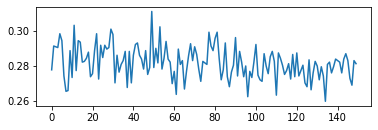

In [18]:

plt.figure(1)

# summarize history for accuracy
plt.subplot(211) 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'val_acc'], loc='upper left')

# summarize history for loss
plt.subplot(212) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout() 
plt.savefig('acc_loss_50.pdf')
plt.show()